In [275]:
import numpy as np

# abrir o arquivo para leitura
arquivo = open('GAMES.txt', 'r')

# ler todas as linhas do arquivo, menos a primeira linha
linhas = arquivo.readlines()[1:]

# float
dados = [list(map(float, linha.strip().split(','))) for linha in linhas]

# Feche o arquivo manualmente
arquivo.close()

# Converta a lista de dados em um array NumPy
dados = np.array(dados)

Medidas de centralidade e de dispersão

Calcular média

In [276]:
media = np.mean(dados)
print('Média: ', media)

Média:  356.3807615230461


Calcular mediana

In [277]:
mediana = np.median(dados)
print('Mediana: ', mediana)

Mediana:  269.5


Calcular moda

In [278]:
unique_values, counts = np.unique(dados, return_counts=True)
max_count_index = np.argmax(counts)
moda = unique_values[max_count_index]
print('Moda: ', moda)

Moda:  262.0


Calcular desvio padrão

In [279]:
desvio_padrao = np.std(dados)
print('Desvio Padrão: ', desvio_padrao)

Desvio Padrão:  240.97337954620855


Calcular variância

In [280]:
variancia = np.var(dados)
print('Variância: ', variancia)

Variância:  58068.16964992108


Calcular coeficiente de variação

In [281]:
coeficiente_variacao = (desvio_padrao / media) * 100
print('Coeficiente de variação: ', coeficiente_variacao)

Coeficiente de variação:  67.61683164836761


Calcular quartis

In [282]:
q1 = np.percentile(dados, 25)  # Primeiro quartil (Q1)
q2 = np.percentile(dados, 50)  # Segundo quartil (mediana, Q2)
q3 = np.percentile(dados, 75)  # Terceiro quartil (Q3)

print('Q1 (Primeiro Quartil):', q1)
print('Q2 (Mediana):', q2)
print('Q3 (Terceiro Quartil):', q3)

Q1 (Primeiro Quartil): 198.0
Q2 (Mediana): 269.5
Q3 (Terceiro Quartil): 449.75


In [283]:
from scipy.stats import kurtosis

curtose = kurtosis(dados)
print('Curtose:', curtose)

Curtose: [-0.06240137 -1.15369007]


Histograma

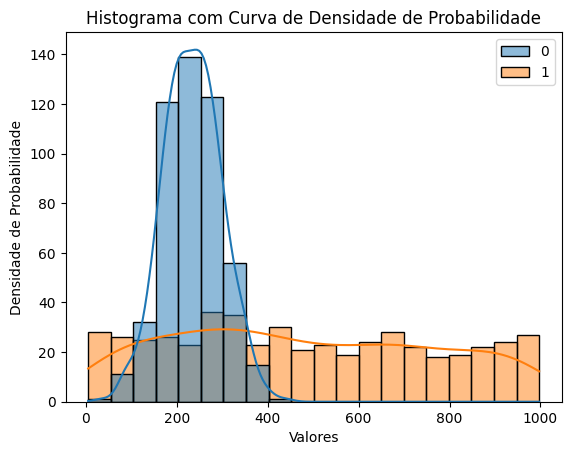

In [284]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crie um histograma com a curva de densidade de probabilidade
sns.histplot(dados, kde=True, color='skyblue')
plt.title('Histograma com Curva de Densidade de Probabilidade')
plt.xlabel('Valores')
plt.ylabel('Densidade de Probabilidade')
plt.show()

Gráfico de linhas

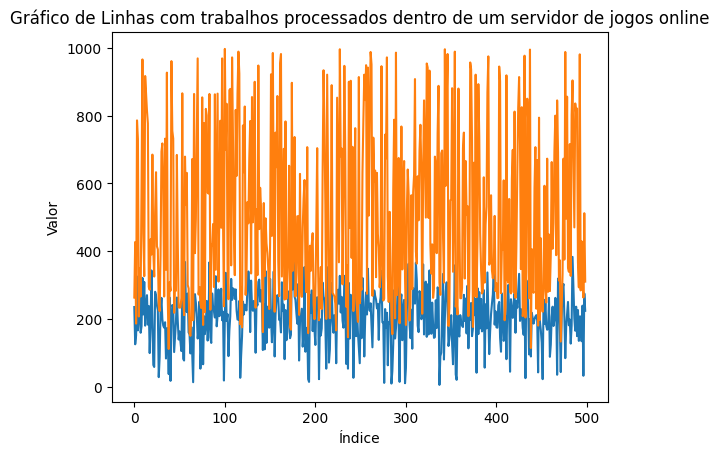

In [285]:
import matplotlib.pyplot as plt

# ordenar os dados
dados_originais = np.sort(dados)

# Crie um gráfico de linhas
plt.plot(dados_originais)

# Personalize o gráfico (rótulos de eixo, título, etc.)
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.title('Gráfico de Linhas com trabalhos processados dentro de um servidor de jogos online')

# Exiba o gráfico
plt.show()


BoxPlot

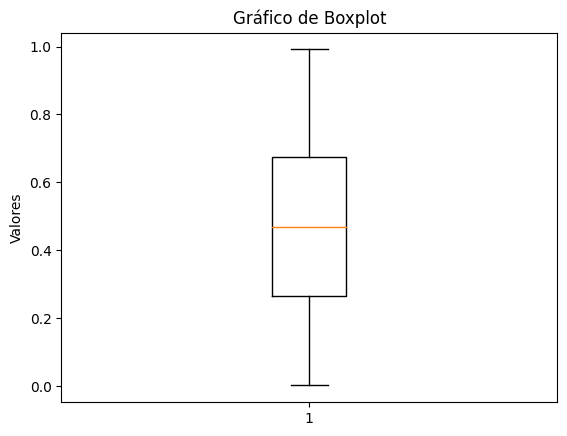

In [286]:
dados = np.random.rand(100)  # Dados aleatórios para fins de exemplo

# Crie o gráfico de boxplot
plt.boxplot(dados)

# Personalize o gráfico (rótulos de eixo, título, etc.)
plt.ylabel('Valores')
plt.title('Gráfico de Boxplot')

# Exiba o gráfico
plt.show()

Teste de hipótese 1

In [287]:
from scipy import stats

# Dividindo os dados em finais de semana (primeira metade) e dias úteis (segunda metade)
meio = len(dados) // 2
finais_de_semana = dados[:meio]
dias_uteis = dados[meio:]

# Nível de significância
alpha = 0.05

# Teste t independente
t_statistic, p_value = stats.ttest_ind(finais_de_semana, dias_uteis)

# Comparação com o nível de significância
if p_value < alpha:
    print("Rejeitamos a hipótese nula.")
    print("A média do tamanho médio de trabalhos nos finais de semana é significativamente maior do que nos dias úteis.")
else:
    print("Não temos evidências para rejeitar a hipótese nula.")
    print("A média do tamanho médio de trabalhos nos finais de semana não é significativamente maior do que nos dias úteis.")

# Exibindo estatísticas do teste
print("Estatística t:", t_statistic)
print("Valor p:", p_value)


Não temos evidências para rejeitar a hipótese nula.
A média do tamanho médio de trabalhos nos finais de semana não é significativamente maior do que nos dias úteis.
Estatística t: -1.2694304240264334
Valor p: 0.20729394284221692


Teste de hipótese II

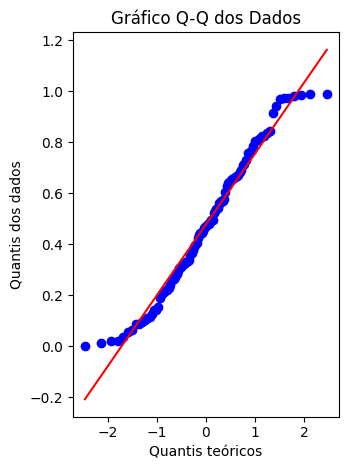

In [288]:
plt.subplot(1, 2, 2)
stats.probplot(dados, dist='norm', plot=plt)
plt.title('Gráfico Q-Q dos Dados')
plt.xlabel('Quantis teóricos')
plt.ylabel('Quantis dos dados')

plt.tight_layout()
plt.show()

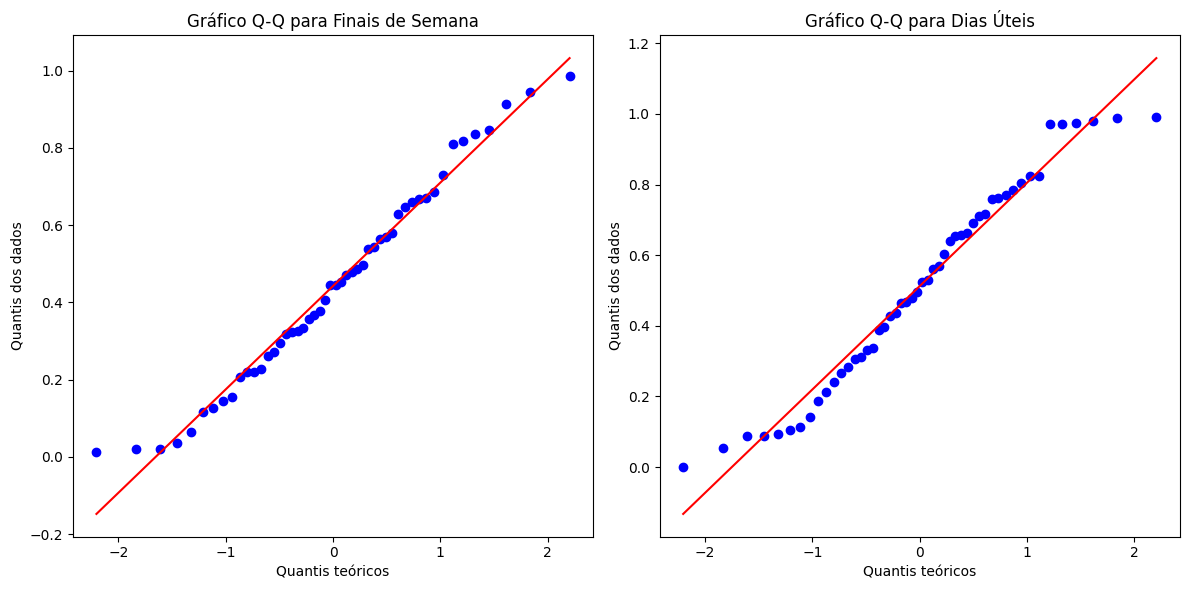

In [289]:
# Gráfico Q-Q (quantile-quantile) para finais de semana
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
stats.probplot(finais_de_semana, dist='norm', plot=plt)
plt.title('Gráfico Q-Q para Finais de Semana')
plt.xlabel('Quantis teóricos')
plt.ylabel('Quantis dos dados')

# Gráfico Q-Q (quantile-quantile) para dias úteis
plt.subplot(1, 2, 2)
stats.probplot(dias_uteis, dist='norm', plot=plt)
plt.title('Gráfico Q-Q para Dias Úteis')
plt.xlabel('Quantis teóricos')
plt.ylabel('Quantis dos dados')

plt.tight_layout()
plt.show()

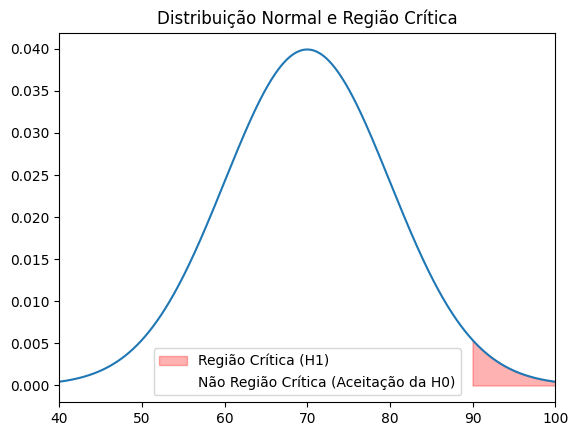

In [290]:
from scipy.stats import norm

# Suponha que você tenha uma média (mu) e um desvio padrão (sigma) para suas amostras
mu = 70  # Substitua pela média das suas amostras
sigma = 10  # Substitua pelo desvio padrão das suas amostras

# Cria um conjunto de valores x ao longo de um intervalo
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 1000)

# Calcula a função de densidade de probabilidade (PDF) da distribuição normal
y = norm.pdf(x, mu, sigma)

# Cria o gráfico da distribuição normal
plt.plot(x, y)

# Define os limites do gráfico
plt.xlim(mu - 3*sigma, mu + 3*sigma)

# Define as regiões críticas para a hipótese
x1 = np.linspace(mu + 2*sigma, mu + 3*sigma, 1000)
x2 = np.linspace(mu - 3*sigma, mu - 2*sigma, 1000)

# Calcula as PDFs para as regiões críticas
y1 = norm.pdf(x1, mu, sigma)
y2 = norm.pdf(x2, mu, sigma)

# Preenche a região crítica relacionada à hipótese alternativa (H1)
plt.fill_between(x1, y1, color='red', alpha=.3, label='Região Crítica (H1)')

# Preenche a região fora da região crítica (rejeição da H0)
plt.fill_between(x2, y2, color='white', alpha=1, label='Não Região Crítica (Aceitação da H0)')

# Adiciona um título e legenda
plt.title('Distribuição Normal e Região Crítica')
plt.legend()

# Exibe o gráfico
plt.show()
